In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings; warnings.simplefilter('ignore')

In [16]:
# Grab and process the raw data.
data_path = ('./amazon_cells_labelled.txt')
sentiment_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
sentiment_raw.columns = ['review', 'sentiment']

In [17]:
sentiment_raw.head()

,review,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


# Naive Bayes Model of the Amazon Sentiment Data #

* The basic idea is to use similar means as given in the guided example of spam detection using a Bernoulli Naive Bayes model.

* I create features that should distinguish positive and negative sentiment by simply using common knowledge of words that connote positve and negative emotions.

In [18]:
neg_words = ['broken', 'awful', 'horrible', 'bad', 'terrible', 'worst', 'poor', 'cheap']

for word in neg_words:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    sentiment_raw[str(word)] = sentiment_raw.review.str.contains(
        ' ' + str(word) + ' ',
        case=False
    )
    
pos_words = ['excellent','super', 'best', 'winner', 'awesome', 'great', 'good', 'well']

for word in pos_words:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    sentiment_raw[str(word)] = sentiment_raw.review.str.contains(
        ' ' + str(word) + ' ',
        case=False
    )

In [19]:
sentiment_raw.head()

,review,sentiment,broken,awful,horrible,bad,terrible,worst,poor,cheap,excellent,super,best,winner,awesome,great,good,well
0,So there is no way for me to plug it in here i...,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",1,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
2,Great for the jawbone.,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,The mic is great.,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [20]:
data = sentiment_raw[neg_words + pos_words]
target = sentiment_raw['sentiment']

* Let's look at the correlation matrix of the features of the model.

* Naive Bayes includes an assumption of independence of inputs.

* A correlation matrix with off-diagonal entries close to zero will be consistent with this assumption.

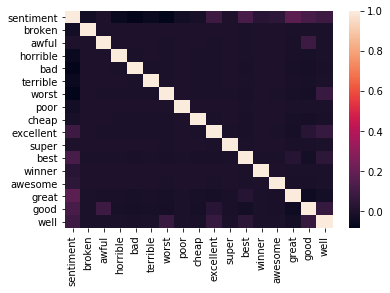

In [21]:
sns.heatmap(sentiment_raw.corr())

* Looks pretty good.

* Independent inputs will be uncorrelated.  This is consistent with what we are seeing.

In [24]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

num_data = data.shape[0]
correct = (num_data - (target != y_pred).sum())/num_data * 100

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

print("Accuracy = {}%".format(correct))

Number of mislabeled points out of a total 1000 points : 411
Accuracy = 58.9%


* Now let's apply this model to yelp


In [25]:
# Grab and process the raw data.
data_path = ('./yelp_labelled.txt')
yelp_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
yelp_raw.columns = ['review', 'sentiment']

In [26]:
neg_words = ['broken', 'awful', 'horrible', 'bad', 'terrible', 'worst', 'poor', 'cheap']

for word in neg_words:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    yelp_raw[str(word)] = yelp_raw.review.str.contains(
        ' ' + str(word) + ' ',
        case=False
    )
    
pos_words = ['excellent','super', 'best', 'winner', 'awesome', 'great', 'good', 'well']

for word in pos_words:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    yelp_raw[str(word)] = yelp_raw.review.str.contains(
        ' ' + str(word) + ' ',
        case=False
    )

In [27]:
datayelp = yelp_raw[neg_words + pos_words]
targetyelp = yelp_raw['sentiment']

In [28]:
# Classify, storing the result in a new variable.
yelp_pred = bnb.predict(datayelp)

num_data = datayelp.shape[0]
correct = (num_data - (targetyelp != yelp_pred).sum())/num_data * 100

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    datayelp.shape[0],
    (targetyelp != yelp_pred).sum()
))

print("Accuracy = {}%".format(correct))

Number of mislabeled points out of a total 1000 points : 406
Accuracy = 59.4%


* Wow - Seems to hold up pretty well

* Even without sophisticated language features, it works as well as Amazon.

* Overall, though, it is not extremely accurate.